In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
url = r"/content/Salary_dataset.csv"
df = pd.read_csv(url)

In [4]:
print(df.shape)

(30, 3)


In [5]:
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [7]:
df[['YearsExperience', 'Salary']]

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [8]:
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


In [10]:
print(df.describe())

       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000


In [11]:
X = df['YearsExperience'].values
y = df['Salary'].values

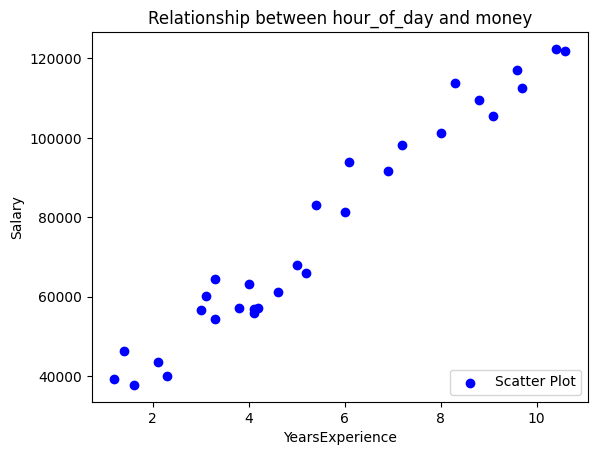

In [12]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between hour_of_day and money')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc=4)
plt.show()

In [13]:
print(X.shape)
print(y.shape)

(30,)
(30,)


In [14]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [15]:
print(X.shape)
print(y.shape)

(30, 1)
(30, 1)


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(10, 1)
(10, 1)


In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

In [19]:
a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [[9426.03876907]]
Estimated model intercept, b: (array([24382.73150234]),)


In [20]:
lm.predict(X)[0:5]


array([[35693.97802523],
       [37579.18577904],
       [39464.39353286],
       [44177.41291739],
       [46062.62067121]])

In [22]:

print(str(lm.predict(np.array(24).reshape(-1, 1))))

[[250607.66196013]]


In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 5941.5401


In [24]:
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.9553


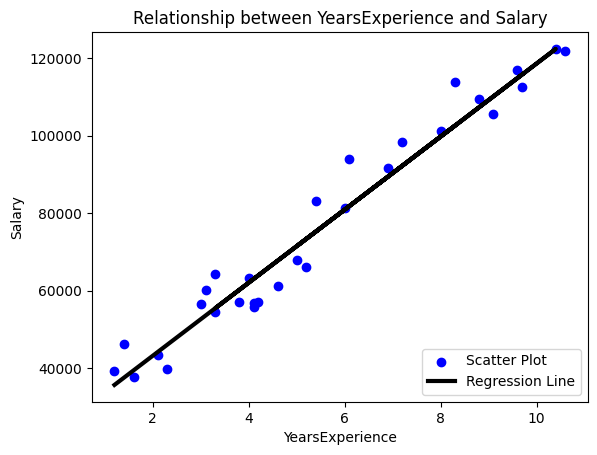

In [25]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between YearsExperience and Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc=4)
plt.show()

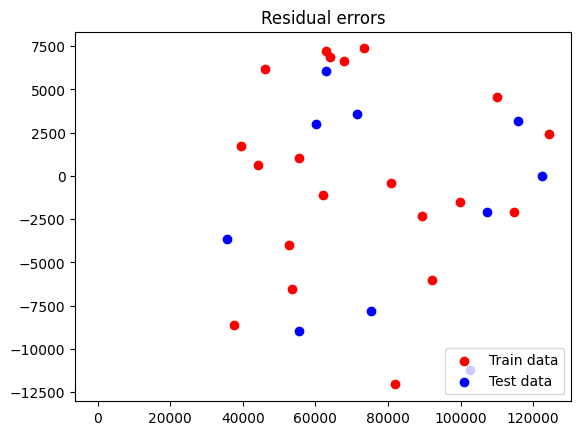

In [26]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [27]:
print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.9549
Test set score: 0.9553


In [29]:
import joblib
joblib.dump(lm, 'lm_regressor.pkl')

['lm_regressor.pkl']